<a href="https://colab.research.google.com/github/Somcodo4/rul-prediction-of-lithium-ion-batteries/blob/main/PREDICTION_OF_RUL_OF_LITHIUM_BATTERY_USING_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#PREDICTION OF RUL OF LITHIUM BATTERY USING SVR

# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import time


In [ ]:
# Load dataset from CSV file
df=pd.read_csv('Battery_RUL II.csv')

In [ ]:
df.head()

,Cycle_Index,Discharge_Time,Decrement,Max_Voltage_Discharge,Min_Voltage_Charge,Time,Time_constant_current,Charging_time,RUL
0,1,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,5,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


In [ ]:
# Split features (X) and target variable (y)
X = df.drop(columns=['RUL'])
y = df['RUL']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize data (optional but recommended for SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:
# Initialize and train SVR model
svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)

SVR(kernel='linear')

In [ ]:


# Make predictions
svr_preds = svr_model.predict(X_test)

In [ ]:
# Make predictions on training and test data
y_train_pred = svr_model.predict(X_train)
y_test_pred = svr_model.predict(X_test)



In [ ]:
# Training time calculation
start_train_time = time.time()
svr_model.fit(X_train, y_train)
training_time = time.time() - start_train_time

KeyboardInterrupt: 

In [ ]:
# Prediction time calculation
start_pred_time = time.time()
svr_preds = svr_model.predict(X_test)
prediction_time = time.time() - start_pred_time

In [ ]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, svr_preds)
mae = mean_absolute_error(y_test, svr_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, svr_preds)

In [ ]:
# Print evaluation metrics
print("Evaluation Metrics for SVR:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")
print(f"Training Time: {training_time} seconds")
print(f"Prediction Time: {prediction_time} seconds")

Evaluation Metrics for SVR:
MSE: 18755543.104950406
MAE: 401.8087092659987
RMSE: 4330.767034250446
R2: -180.06320837875273
Training Time: 4563.699399471283 seconds
Prediction Time: 0.7549676895141602 seconds


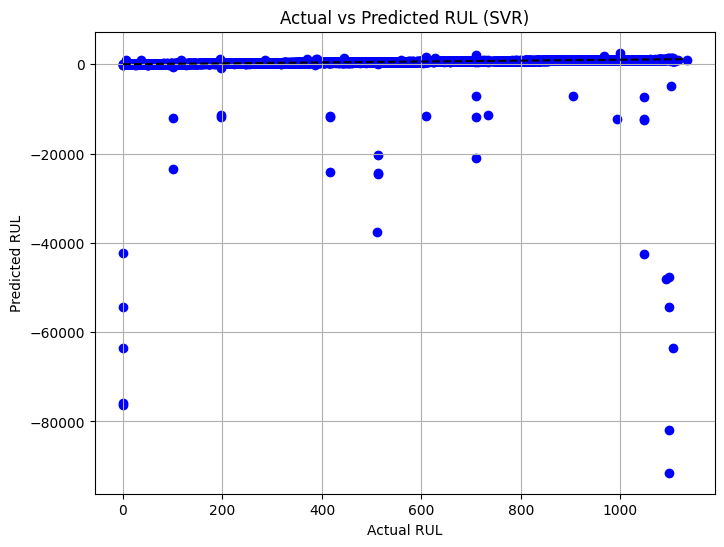

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted RUL
plt.figure(figsize=(8, 6))
plt.scatter(y_test, svr_preds, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('Actual vs Predicted RUL (SVR)')
plt.grid(True)
plt.show()

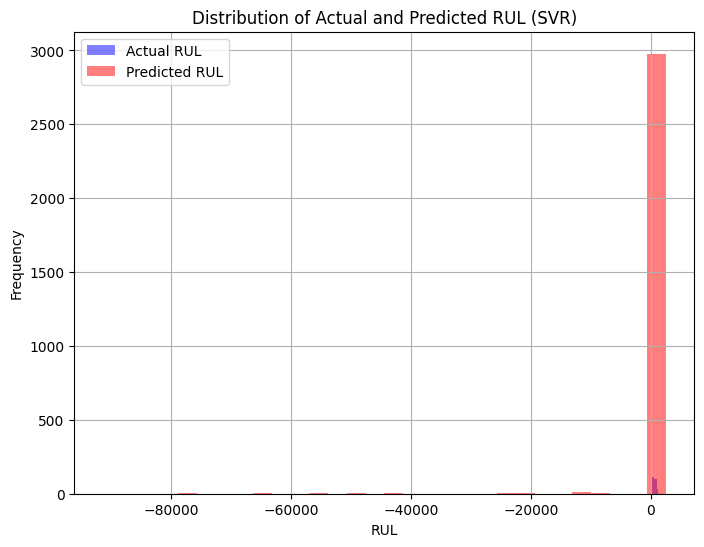

In [ ]:
# Plot distribution of actual and predicted RUL
plt.figure(figsize=(8, 6))
plt.hist(y_test, bins=30, alpha=0.5, color='blue', label='Actual RUL')
plt.hist(svr_preds, bins=30, alpha=0.5, color='red', label='Predicted RUL')
plt.xlabel('RUL')
plt.ylabel('Frequency')
plt.title('Distribution of Actual and Predicted RUL (SVR)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Make predictions on training and test data
y_train_pred = svr_model.predict(X_train)
y_test_pred = svr_model.predict(X_test)

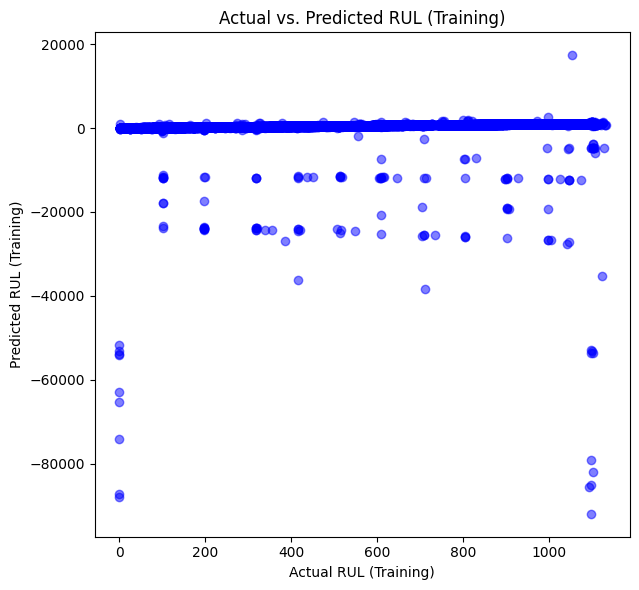

In [ ]:
# Visualize training data with respect to RUL
plt.figure(figsize=(12, 6))

# Scatter plot for training data
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5, color='blue')
plt.xlabel('Actual RUL (Training)')
plt.ylabel('Predicted RUL (Training)')
plt.title('Actual vs. Predicted RUL (Training)')

plt.tight_layout()
plt.show()

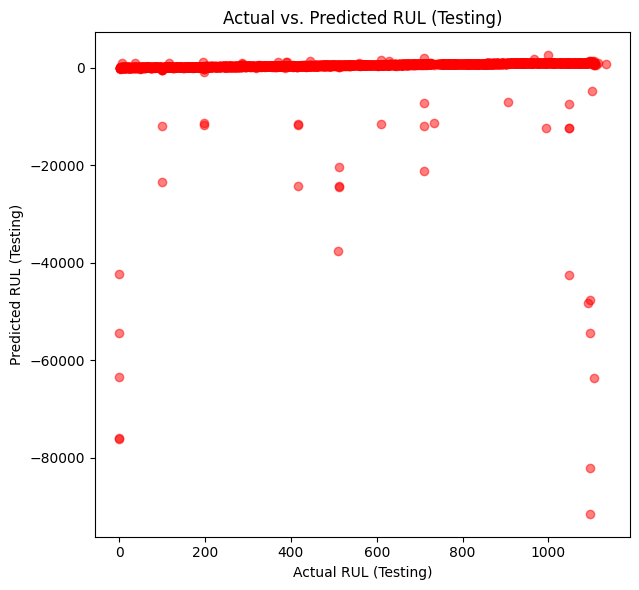

In [ ]:
# Visualize testing data with respect to RUL
plt.figure(figsize=(12, 6))
# Scatter plot for test data
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred, color='red', alpha=0.5)
plt.xlabel('Actual RUL (Testing)')
plt.ylabel('Predicted RUL (Testing)')
plt.title('Actual vs. Predicted RUL (Testing)')

plt.tight_layout()
plt.show()

In [ ]:
# Calculate residuals
residuals = y_test_pred - svr_preds

# Plot residual plot
plt.figure(figsize=(8, 6))
plt.scatter(random_forest_preds, residuals, color='blue')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted RUL')
plt.ylabel('Residuals')
plt.title('Residual Plot (Random Forest)')
plt.grid(True)
plt.show()

ValueError: operands could not be broadcast together with shapes (3013,) (12051,) 